In [58]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, NoNorm

In [3]:
f = 'ilk-3b-1024.tif'
ds = Image.open(f)

In [4]:
img_array = np.array(ds)

In [5]:
img_array.shape

(1024, 1024, 3)

In [7]:
i, j = np.indices(img_array.shape[:2])

In [8]:
img_ind = np.r_["2,3,0", i, j, img_array]

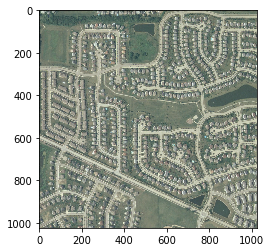

In [15]:
plt.imshow(img_array)

In [21]:
nsamples, nx, ny = img_array.shape
d2_image = img_array.reshape((nsamples,nx*ny))

In [30]:
img = img_array.reshape((img_array.shape[0] * img_array.shape[1], 3))

In [31]:
km2 = KMeans(5)
km2.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
out = np.reshape(np.array(km2.labels_), (1024, 1024))

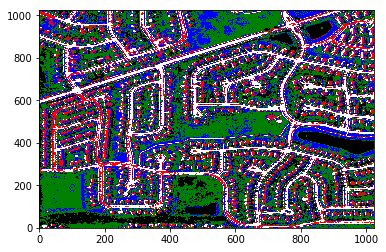

In [60]:
cmap = ListedColormap(['Red', 'Green', 'Blue', 'Black', 'White'])
plt.pcolor(out, cmap=cmap, norm=NoNorm())